### Persistent homology examples

* Ripser [paper](https://www.theoj.org/joss-papers/joss.00925/10.21105.joss.00925.pdf) [code](https://github.com/scikit-tda/ripser.py) (fast)
* Dionysus 2 [code](https://mrzv.org/software/dionysus2/) (representative examples)
* Nico's [code](https://github.com/nhchristianson/Math-text-semantic-networks)
* Ann's [code](https://github.com/asizemore/PH_tutorial/blob/master/Tutorial_day1.ipynb)

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Try persistent homology

In [7]:
import wiki

topic = 'biochemistry'
path_saved = '/Users/harangju/Box Sync/Research/my papers/wikipedia paper/data/graphs/full/'
network = wiki.Net()
network.load_graph(path_saved + topic + '.gexf')

In [9]:
%time network.barcodes

wiki.Net: computing barcodes... (skip negatives)
wiki.Net: barcode 11234/11251
CPU times: user 13.4 s, sys: 964 ms, total: 14.4 s
Wall time: 16 s


,dim,birth,death,birth simplex,death simplex,birth nodes,death nodes
0,0,-2500,inf,[Carbon],[],[Carbon],[]
1,0,-2500,800.0,[Nutrition],"[Ethanol, Ammonia]",[Nutrition],[Ethanol]
2,0,-2000,-2000.0,[Alcohol],"[Carbon, Alcohol]",[Alcohol],[Alcohol]
3,0,-2000,1600.0,[Medicine],"[Life, Microbiology]",[Medicine],[Life]
4,0,-2000,-2000.0,[Pharmacist],"[Medicine, Pharmacist]",[Pharmacist],"[Medicine, Pharmacist]"
...,...,...,...,...,...,...,...
6041,5,1911,1911.0,"[Electron, Proton, Atomic nucleus, Atomic numb...","[Atom, Electron, Proton, Atomic nucleus, Atomi...",[Atomic nucleus],[Atomic nucleus]
6042,5,1911,1911.0,"[Electron, Atomic nucleus, Neutron, Atomic num...","[Atom, Electron, Atomic nucleus, Neutron, Atom...",[Atomic nucleus],[Atomic nucleus]
6043,5,1911,1911.0,"[Hydrogen, Proton, Atomic nucleus, Neutron, At...","[Atom, Hydrogen, Proton, Atomic nucleus, Neutr...",[Atomic nucleus],[Atomic nucleus]
6044,5,1911,1911.0,"[Proton, Atomic nucleus, Neutron, Atomic numbe...","[Atom, Proton, Atomic nucleus, Neutron, Atomic...",[Atomic nucleus],[Atomic nucleus]


### Plot

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd

sns.set(style='whitegrid', font_scale=1.6)

In [11]:
def plot_barcodes(barcodes):
    """
    """
    colors = [mcd.XKCD_COLORS['xkcd:'+c]
          for c in ['emerald green', 'tealish', 'peacock blue', 
                    'grey', 'brown', 'red', 'yellow']]
    plt.figure(figsize=(15,6))
    for i, row in barcodes.iterrows():
        birth = row['birth']
        death = row['death']
        x = [birth, 2050] if death==np.inf else\
            [birth, death]
        plt.plot(x, i*np.ones(len(x)), colors[row['dim']])
        if death != np.inf:
            plt.plot(death, i, 'r.')
    plt.axvline(x=2040, linestyle='--', color=mcd.XKCD_COLORS['xkcd:grey'])
    plt.gca().axes.yaxis.set_ticklabels([])

In [12]:
def plot_persistence_diagram(barcodes):
    colors = [mcd.XKCD_COLORS['xkcd:'+c]
      for c in ['emerald green', 'tealish', 'peacock blue', 
                'grey', 'brown', 'red', 'yellow']]
    plt.figure(figsize=(10,10))
    for dim in set(barcodes['dim']):
        data = barcodes.loc[barcodes['dim']==dim]
        data.loc[data['death']==np.inf,'death'] = 2030
        plt.plot(data['birth'], data['death'], '.')
    x = [barcodes['birth'].min(),
         barcodes.loc[barcodes['death']!=np.inf,'death'].max()]
    print(x)
    plt.plot(x, [2030, 2030], '--')

CPU times: user 1min 14s, sys: 948 ms, total: 1min 15s
Wall time: 1min 21s


Text(0.5, 1.0, 'biochemistry')

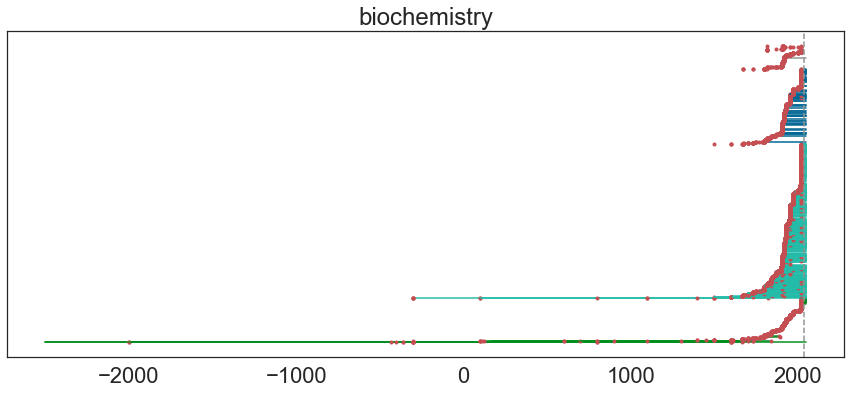

In [13]:
%time plot_barcodes(network.barcodes)
plt.title(topic)
# %time plot_persistence_diagram(barcodes.loc[barcodes['birth']>1900])

In [14]:
max(network.barcodes['dim'])

6

In [15]:
births = {n: [0]*max(network.barcodes['dim']) for n in sorted(network.nodes)}
deaths = {n: [0]*max(network.barcodes['dim']) for n in sorted(network.nodes)}
for row in network.barcodes.iterrows():
    for node in row[1]['birth nodes']:
        births[node][row[1]['dim']-1] += 1
    for node in row[1]['death nodes']:
        deaths[node][row[1]['dim']-1] += 1

In [16]:
counts = {'names': list(range(len(network.nodes)))*2,
          'type': ['births']*len(network.nodes) + ['deaths']*len(network.nodes),
          'value': [sum(births[n]) for n in network.nodes] +\
                   [sum(deaths[n]) for n in network.nodes]}

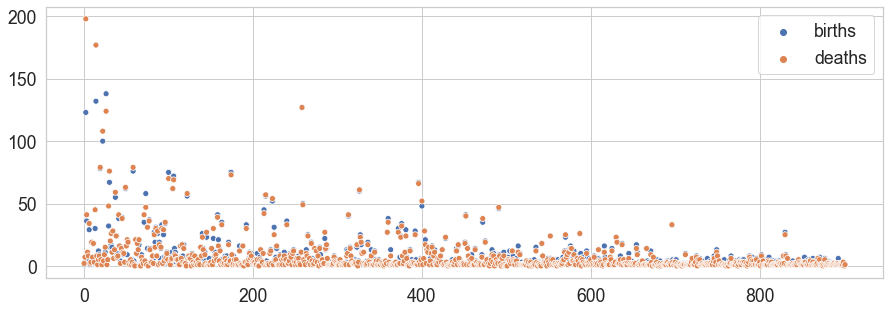

In [119]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='names', y='value', hue='type', data=counts)

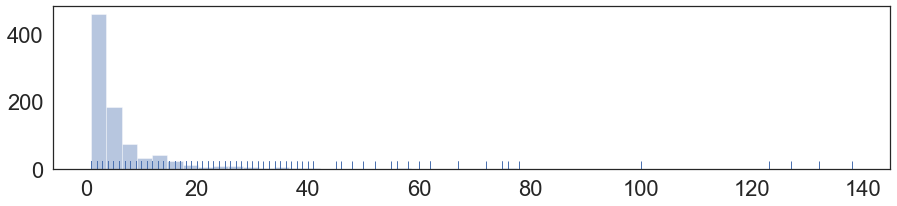

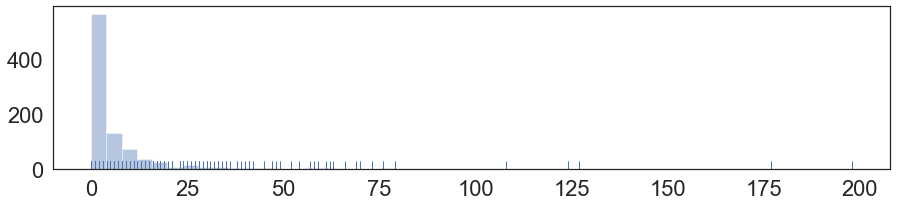

In [41]:
plt.figure(figsize=(15,3))
sns.distplot([sum(x) for x in births.values()], kde=False, rug=True)
plt.figure(figsize=(15,3))
sns.distplot([sum(x) for x in deaths.values()], kde=False, rug=True)

Text(0, 0.5, 'P')

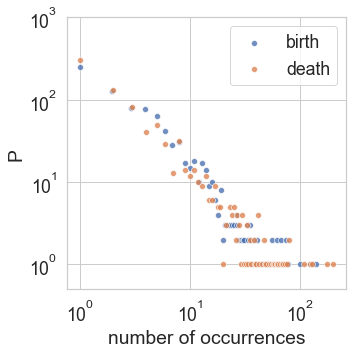

In [118]:
fig = plt.figure(figsize=(5,5))
hist, edges = np.histogram([sum(x) for x in births.values()], 1000)
ax = sns.scatterplot('x', 'y', data={'x': edges[:-1],
                                     'y': hist}, alpha=0.8)
hist, edges = np.histogram([sum(x) for x in deaths.values()], 1000)
sns.scatterplot('x', 'y', data={'x': edges[:-1],
                                'y': hist}, alpha=0.8)
ax.set_yscale('log')
ax.set_ylim([.5,1000])
ax.set_xscale('log')
ax.set_ylim([.5,1000])
ax.legend(['birth', 'death'])
ax.set_xlabel('number of occurrences')
ax.set_ylabel('P')

In [136]:
[n for n, o in births.items() if sum(o)>60]

['Actin',
 'Archaea',
 'Atomic nucleus',
 'Biomolecule',
 'Carbohydrate',
 'Chemical compound',
 'Chemical formula',
 'Covalent bond',
 'Dna',
 'Eukaryote',
 'Organism',
 'Proton',
 'Structural biology',
 'Water']

In [137]:
[n for n, o in deaths.items() if sum(o)>60]

['Actin',
 'Archaea',
 'Atomic nucleus',
 'Biological membrane',
 'Biomolecule',
 'Carbohydrate',
 'Chemical compound',
 'Chemical formula',
 'Covalent bond',
 'Dna',
 'Eukaryote',
 'Organism',
 'Proton',
 'Structural biology',
 'Water']

In [135]:
[n for n in network.graph.nodes if len(network.graph[n])>44]

['Molecule',
 'Organism',
 'Gene',
 'Dna',
 'Protein',
 'Amino acid',
 'Cell (biology)',
 'Enzyme']